<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/week14/14_graph_adjacency_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile graph.h
#ifndef __GRAPH_H__
#define __GRAPH_H__

#include <vector>
#include <fstream>
#include <string>
#include <queue>

using namespace std;

typedef vector<int> vi;
typedef vector<vi> vii;

class Graph {
    vii g;
    bool directed;

public:
    Graph(int n, bool directed=true): g(n, vi(n, 0)), directed(directed) {}
    void edge(int u, int v) {
        g[u][v] = 1;
        if (!directed) {
            g[v][u] = 1;
        }
    }
    
    // s: source o vertice inicial
    vi bfs(int s) {
        int n = g.size();
        vector<bool>    visited(n, false);
        vi              path(n, -1);
        queue<int>      q;

        visited[s] = true;
        q.push(s);
        while (!q.empty()) {
            int u = q.front(); q.pop();
            for (int v = 0; v < n; ++v) {
                if (g[u][v] != 0 && !visited[v]) {
                    visited[v] = true;
                    path[v] = u;
                    q.push(v);
                }
            }
        }
        return path;
    }
    void savedot(string filename) {
        ofstream file(filename);
        string rel;
        if (directed) {
            file << "digraph G {\n";
            rel = "->";
        } else {
            file << "strict graph G {\n";
            rel = "--";
        }
        for (int u = 0; u < g.size(); ++u) {
            for (int v = 0; v < g.size(); ++v) {
                if (g[u][v] != 0) {
                    file << "\t" << u << rel << v << ";\n";
                }
            }
        }
        file << "}";
    }
};

#endif

Overwriting graph.h


In [ ]:
%%writefile amgraphTest.cpp
#include <iostream>
#include "graph.h"

using namespace std;

int main() {
    Graph* g = new Graph(8, false);

    g->edge(0, 1);
    g->edge(0, 2);
    g->edge(0, 4);
    g->edge(1, 3);
    g->edge(1, 6);
    g->edge(2, 4);
    g->edge(3, 5);
    g->edge(3, 7);
    g->edge(4, 6);
    g->edge(4, 7);
    g->edge(6, 7);

    vi path = g->bfs(0);

    for (auto x : path) {
        cout << x << " ";
    }
    cout << endl;

    g->savedot("uno.dot");

    delete g;
    return 0;
}

Overwriting amgraphTest.cpp


In [ ]:
%%script bash
g++ -std=c++17 amgraphTest.cpp && ./a.out

-1 0 0 1 0 3 1 4 


In [ ]:
!cat uno.dot

strict graph G {
	0--1;
	0--2;
	0--4;
	1--0;
	1--3;
	1--6;
	2--0;
	2--4;
	3--1;
	3--5;
	3--7;
	4--0;
	4--2;
	4--6;
	4--7;
	5--3;
	6--1;
	6--4;
	6--7;
	7--3;
	7--4;
	7--6;
}

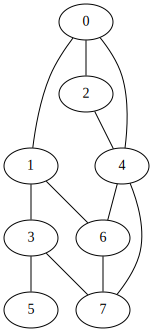

In [ ]:
import graphviz as gv
gv.Source.from_file("uno.dot")